In [294]:
# COGS109
# Homework 4
# Gustav Sto. Tomas
# A15358078

import pandas as pd
import pandas.tseries
from pandas.core import datetools
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('hw3_divseq_data.csv')

In [295]:
df.head()

,Lars2,Malat1,mature
0,9.95,6.69,1
1,10.54,8.53,1
2,6.58,8.74,1
3,7.49,9.09,1
4,7.42,9.87,1


In [264]:
#2a
logreg2 = smf.logit(formula = 'mature ~ Lars2 + Malat1', data=df).fit()
print(logreg2.summary())
print(logreg2.pvalues)
pred_both = df[['Lars2','Malat1']]

df['pred_both'] = logreg2.predict(pred_both)
df['pred_both_mature'] = 1*(df.pred_both > 0.5)
df['pred_both_immature'] = 1 *(df.pred_both < 0.5)

Optimization terminated successfully.
         Current function value: 0.196827
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 mature   No. Observations:                  817
Model:                          Logit   Df Residuals:                      814
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Oct 2017   Pseudo R-squ.:                  0.6088
Time:                        19:23:53   Log-Likelihood:                -160.81
converged:                       True   LL-Null:                       -411.04
                                        LLR p-value:                2.122e-109
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.5697      2.177    -11.743      0.000     -29.838     -21.302
Lars2          2.3119      0.

In [265]:
# 2a : confusion matrix

conf_mat = confusion_matrix(df.mature, df.pred_both_mature,)
print(conf_mat)

ok = np.zeros((3,3))
#print(ok)
ok[0,2] = 1
ok[2,0] = 1
ok[1,1] = conf_mat[0,0]
ok[1,2] = conf_mat[0,1]
ok[2,1] = conf_mat[1,0]
ok[2,2] = conf_mat[1,1]
print(ok)

con = pd.DataFrame(data=conf_mat, index=['true_immature','true_mature'],columns=['pred_immature','pred_mature'])
print(con)


correct_m = conf_mat[1,1]
correct_im = conf_mat[0,0]
correct = conf_mat[0,0]+conf_mat[1,1]
print()
print()
print('correctly predicted mature (TP):', correct_m)
print('correctly predicted immature (TN):', correct_im)
print('correctly predicted:', correct)
print('correctly predicted:', correct/len(df))

[[618  34]
 [ 45 120]]
[[   0.    0.    1.]
 [   0.  618.   34.]
 [   1.   45.  120.]]
               pred_immature  pred_mature
true_immature            618           34
true_mature               45          120


correctly predicted mature (TP): 120
correctly predicted immature (TN): 618
correctly predicted: 738
correctly predicted: 0.903304773562


In [266]:
#2 b and c

df['pred_both_20'] = 1*(df.pred_both > 0.2)
df['pred_both_80'] = 1*(df.pred_both > 0.8)



conf_mat2 = confusion_matrix(df.mature, df.pred_both_20,)
#print(conf_mat2)

conf_mat8 = confusion_matrix(df.mature, df.pred_both_80,)
#print(conf_mat8)

con2 = pd.DataFrame(data=conf_mat2, index=['true_immature','true_mature'],columns=['pred_immature','pred_mature'])
print('confusion matrix with threshold 0.2:')
print(con2)
print()

sensitivity2 = conf_mat2[0,0]/(conf_mat2[0,0]+conf_mat2[0,1])
print("Sensitivity 0.2: " + str(sensitivity2))
specificity2 = conf_mat2[1,1]/(conf_mat2[1,0]+conf_mat2[1,1])
print("Specificity 0.2: " + str(specificity2))
print('with a threshold of 0.2, sensitivity is somewhat lower, but specificity is very high, meaning fewer false positives')

print()

con8 = pd.DataFrame(data=conf_mat8, index=['true_immature','true_mature'],columns=['pred_immature','pred_mature'])
print('confusion_matrix with threshold 0.8:')
print(con8)
print()


sensitivity8 = conf_mat8[0,0]/(conf_mat8[0,0]+conf_mat8[0,1])
print("Sensitivity 0.8: " + str(sensitivity8))
specificity8 = conf_mat8[1,1]/(conf_mat8[1,0]+conf_mat8[1,1])
print("Specificity 0.8: " + str(specificity8))
print('with a threshold of 0.8, sensitivity is somewhat higher but specificity is much lower, meaning more false negatives.')
print()
print('more actually mature neurons are correctly classified as mature with a threshold of 0.2. a threshold of 0.8 instead classifies even more of the immature neurons correctly, but many more mature neurons are falsely classified as immature (false negatives). since we want to make better classifications for mature neurons, a threshold of 0.2 is to prefer.')




confusion matrix with threshold 0.2:
               pred_immature  pred_mature
true_immature            575           77
true_mature                7          158

Sensitivity 0.2: 0.881901840491
Specificity 0.2: 0.957575757576
with a threshold of 0.2, sensitivity is somewhat lower, but specificity is very high, meaning fewer false positives

confusion_matrix with threshold 0.8:
               pred_immature  pred_mature
true_immature            643            9
true_mature               90           75

Sensitivity 0.8: 0.986196319018
Specificity 0.8: 0.454545454545
with a threshold of 0.8, sensitivity is somewhat higher but specificity is much lower, meaning more false negatives.

more actually mature neurons are correctly classified as mature with a threshold of 0.2. a threshold of 0.8 instead classifies even more of the immature neurons correctly, but many more mature neurons are falsely classified as immature (false negatives). since we want to make better classifications for matur

[[  0 652]
 [  0 165]]
[[534 118]
 [  4 161]]
[[575  77]
 [  7 158]]
[[592  60]
 [ 19 146]]
[[606  46]
 [ 36 129]]
[[618  34]
 [ 45 120]]
[[630  22]
 [ 54 111]]
[[637  15]
 [ 70  95]]
[[643   9]
 [ 90  75]]
[[648   4]
 [107  58]]
[0.0, 0.024242424242424288, 0.042424242424242475, 0.11515151515151512, 0.21818181818181814, 0.27272727272727271, 0.32727272727272727, 0.4242424242424242, 0.54545454545454541, 0.64848484848484844]
[[652   0]
 [165   0]]
[[118 534]
 [161   4]]
[[ 77 575]
 [158   7]]
[[ 60 592]
 [146  19]]
[[ 46 606]
 [129  36]]
[[ 34 618]
 [120  45]]
[[ 22 630]
 [111  54]]
[[ 15 637]
 [ 95  70]]
[[  9 643]
 [ 75  90]]
[[  4 648]
 [ 58 107]]
[1.0, 0.18098159509202455, 0.11809815950920245, 0.09202453987730061, 0.070552147239263799, 0.052147239263803678, 0.033742331288343558, 0.023006134969325152, 0.013803680981595092, 0.0061349693251533744]


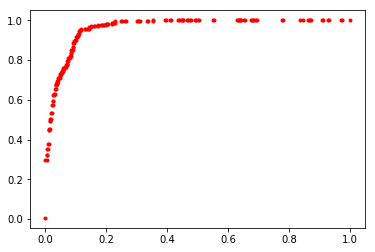

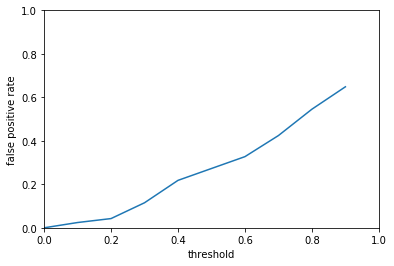

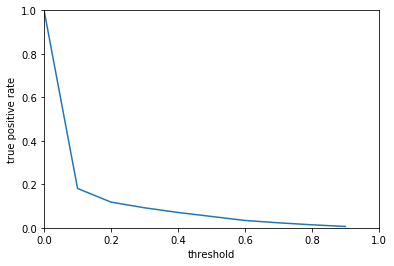

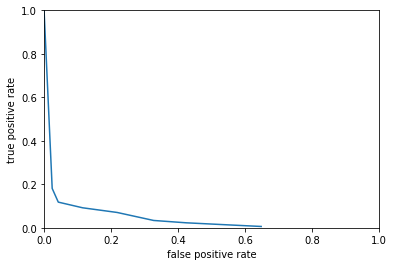

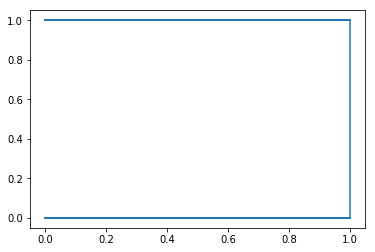

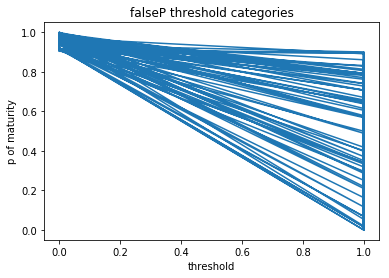

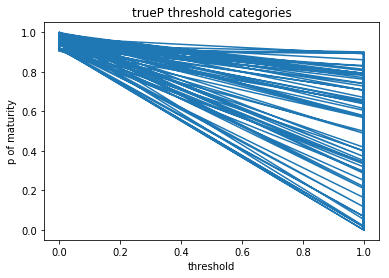

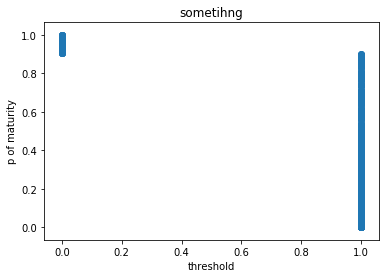

[[  4 648]
 [ 58 107]]
169
Sensitivity: 0.00613496932515
Specificity: 0.648484848485


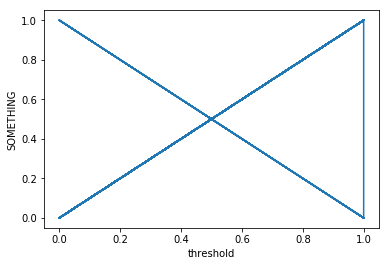

In [267]:
#2 d

falseP = []
threshold = np.arange(0,1,0.1)
for i in range(len(threshold)):
    cat_labels = 1*(df.pred_both > threshold[i])
    cons = confusion_matrix(df.mature,cat_labels)
    sensitivity = cons[0,0]/(cons[0,0]+cons[0,1])
    specificity = cons[1,1]/(cons[1,0]+cons[1,1])
    fpr = 1-specificity
    tpr = sensitivity
    falseP.append(fpr)
    #print(fpr)
    print(cons)

print(falseP)
    

trueP = []
threshold = np.arange(0,1,0.1)
for i in range(len(threshold)):
    cat_labels = 1*(df.pred_both < threshold[i])
    cons = confusion_matrix(df.mature,cat_labels)
    sensitivity = cons[0,0]/(cons[0,0]+cons[0,1])
    specificity = cons[1,1]/(cons[1,0]+cons[1,1])
    fpr = 1-specificity
    tpr = sensitivity
    trueP.append(tpr)
    #print(tpr)
    print(cons)

print(trueP)    
    

fig,ax = plt.subplots()
ax.set_autoscale_on(False)
plt.plot(threshold,falseP)
plt.xlabel('threshold')
plt.ylabel('false positive rate')
plt.show()


f = lambda x: falseP

fig,ax = plt.subplots()
ax.set_autoscale_on(False)
plt.plot(threshold,trueP)
plt.xlabel('threshold')
plt.ylabel('true positive rate')
plt.show()



fig,ax = plt.subplots()
ax.set_autoscale_on(False)
plt.plot(falseP,trueP)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()



#### heree's something else?

for i in range(len(threshold)):
    cat_labels2 = 1*(df.pred_both < threshold[i])
    

#FP = []
#for y_i, cat_labels_i in zip(df.pred_both,cat_labels):
#    if (y_i,cat_labels_i) == (0,1):
#        FP.append(y_i[i],cat_labels_i[i])
#print(FP)        
        
       # print(new[i])
    #fig,ax = plt.subplots()
    #plt.plot(cat_labels,df.pred_both)
    #plt.xlabel('threshold')
    #plt.ylabel('pred value')
    
    
#df_m == df[df.mature==1]
#df_i == df[df.mature==0]
#fig,ax = plt.subplots()
#ax.plot(df_m,cat_labels)
#plt.show()


fig,ax = plt.subplots()
plt.plot(cat_labels,df.mature)
plt.show()

    
fig,ax = plt.subplots()
plt.plot(cat_labels,df.pred_both)
plt.xlabel('threshold')
plt.ylabel('p of maturity')   
plt.title('falseP threshold categories')
plt.show()


fig,ax = plt.subplots()
plt.plot(cat_labels2,df.pred_both)
plt.xlabel('threshold')
plt.ylabel('p of maturity')   
plt.title('trueP threshold categories')
plt.show()


#df_m = df[df.mature == 1]

#fig,ax = plt.subplots()
#plt.plot(cat_labels,df_m)
#plt.show()

fig,ax = plt.subplots()
ax.scatter(cat_labels,df.pred_both)
plt.xlabel('threshold')
plt.ylabel('p of maturity')   
plt.title('sometihng')
plt.show()



#
#some = []
#for i in range(len(cat_labels)):
#    if cat_labels[i] == True and df.mature[i] == False:
#        some.append(df.)
    
    
#    if cat_labels[i] == True:
#        print(cat_labels[i])
        
#print(df.pred_both)        
#for i in cat_labels:
#    if cat_labels[i] == True:
#        cat_labels[i] = 1
#    else: cat_labels[i] = 0
        #cat_labels[i] == 0

    
conf = confusion_matrix(df.mature,cat_labels)
print(conf)
print(len(df.mature)-conf[0,1])
sensitivity = conf[0,0]/(conf[0,0]+conf[0,1])
print("Sensitivity:", sensitivity)
specificity = conf[1,1]/(conf[1,0]+conf[1,1])
print("Specificity:", specificity)


y = lambda x: cat_labels==df.mature


fig,ax = plt.subplots()
ax.plot(cat_labels,y(df.mature))
plt.xlabel('threshold')
plt.ylabel('SOMETHING')   
plt.show()



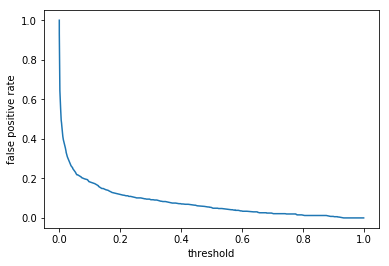

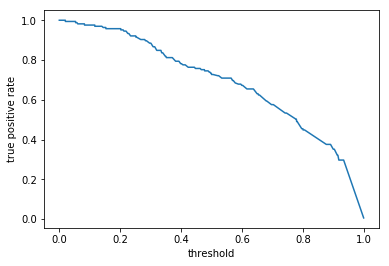

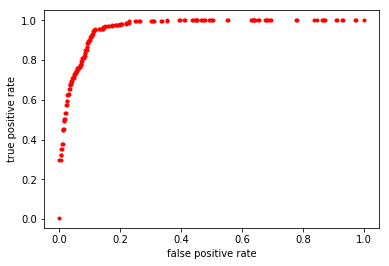

ValueError: `markevery` is a tuple but its len is not 2; markevery=(array([ 0.        ,  0.        ,  0.00460123,  0.00460123,  0.00613497,
        0.00613497,  0.00766871,  0.00766871,  0.01226994,  0.01226994,
        0.01380368,  0.01380368,  0.01533742,  0.01533742,  0.01687117,
        0.01687117,  0.01993865,  0.01993865,  0.02147239,  0.02147239,
        0.02453988,  0.02453988,  0.02607362,  0.02607362,  0.02760736,
        0.02760736,  0.03067485,  0.03067485,  0.03374233,  0.03374233,
        0.03527607,  0.03527607,  0.03834356,  0.03834356,  0.0398773 ,
        0.0398773 ,  0.04141104,  0.04141104,  0.04754601,  0.04754601,
        0.04907975,  0.04907975,  0.05214724,  0.05214724,  0.05368098,
        0.05368098,  0.05521472,  0.05521472,  0.05828221,  0.05828221,
        0.05981595,  0.05981595,  0.06134969,  0.06441718,  0.06441718,
        0.0690184 ,  0.0690184 ,  0.07055215,  0.07055215,  0.07208589,
        0.07208589,  0.07515337,  0.07515337,  0.08128834,  0.08128834,
        0.08282209,  0.08282209,  0.08435583,  0.08435583,  0.0904908 ,
        0.0904908 ,  0.09202454,  0.09202454,  0.09509202,  0.09509202,
        0.09662577,  0.09662577,  0.10122699,  0.10122699,  0.10276074,
        0.10276074,  0.10889571,  0.10889571,  0.11196319,  0.11196319,
        0.11503067,  0.11503067,  0.11809816,  0.11809816,  0.12883436,
        0.13190184,  0.13650307,  0.13957055,  0.14263804,  0.14263804,
        0.14877301,  0.14877301,  0.1595092 ,  0.16257669,  0.17331288,
        0.17331288,  0.18404908,  0.18711656,  0.19018405,  0.19325153,
        0.19785276,  0.19785276,  0.20398773,  0.20705521,  0.21779141,
        0.21779141,  0.22392638,  0.22699387,  0.23006135,  0.23006135,
        0.25      ,  0.25306748,  0.2607362 ,  0.26380368,  0.3006135 ,
        0.30368098,  0.30674847,  0.30981595,  0.33282209,  0.33588957,
        0.35429448,  0.35429448,  0.39263804,  0.39570552,  0.4095092 ,
        0.41257669,  0.43711656,  0.44018405,  0.44478528,  0.44785276,
        0.45092025,  0.45398773,  0.46625767,  0.46932515,  0.47699387,
        0.48006135,  0.49079755,  0.49386503,  0.50153374,  0.50460123,
        0.5506135 ,  0.55368098,  0.6303681 ,  0.63343558,  0.63650307,
        0.63957055,  0.64110429,  0.64417178,  0.65184049,  0.65490798,
        0.67638037,  0.67944785,  0.68251534,  0.68558282,  0.69171779,
        0.69478528,  0.77760736,  0.78067485,  0.83742331,  0.84662577,
        0.86349693,  0.86656442,  0.87116564,  0.87423313,  0.9095092 ,
        0.91257669,  0.92944785,  0.93251534,  0.9708589 ,  0.97392638,  1.        ]), array([ 0.00606061,  0.2969697 ,  0.2969697 ,  0.32121212,  0.32121212,
        0.35151515,  0.35151515,  0.37575758,  0.37575758,  0.44848485,
        0.44848485,  0.45454545,  0.45454545,  0.49090909,  0.49090909,
        0.5030303 ,  0.5030303 ,  0.53333333,  0.53333333,  0.57575758,
        0.57575758,  0.59393939,  0.59393939,  0.62424242,  0.62424242,
        0.63030303,  0.63030303,  0.65454545,  0.65454545,  0.67272727,
        0.67272727,  0.67878788,  0.67878788,  0.68484848,  0.68484848,
        0.6969697 ,  0.6969697 ,  0.70909091,  0.70909091,  0.72121212,
        0.72121212,  0.72727273,  0.72727273,  0.73333333,  0.73333333,
        0.73939394,  0.73939394,  0.74545455,  0.74545455,  0.75151515,
        0.75151515,  0.75757576,  0.75757576,  0.75757576,  0.76363636,
        0.76363636,  0.77575758,  0.77575758,  0.78181818,  0.78181818,
        0.79393939,  0.79393939,  0.81212121,  0.81212121,  0.81818182,
        0.81818182,  0.83636364,  0.83636364,  0.84848485,  0.84848485,
        0.86666667,  0.86666667,  0.88484848,  0.88484848,  0.8969697 ,
        0.8969697 ,  0.9030303 ,  0.9030303 ,  0.91515152,  0.91515152,
        0.92121212,  0.92121212,  0.93333333,  0.93333333,  0.94545455,
        0.94545455,  0.95151515,  0.95151515,  0.95757576,  0.95757576,
        0.95757576,  0.95757576,  0.95757576,  0.95757576,  0.96363636,
        0.96363636,  0.96969697,  0.96969697,  0.96969697,  0.96969697,
        0.97575758,  0.97575758,  0.97575758,  0.97575758,  0.97575758,
        0.97575758,  0.98181818,  0.98181818,  0.98181818,  0.98181818,
        0.98787879,  0.98787879,  0.98787879,  0.98787879,  0.99393939,
        0.99393939,  0.99393939,  0.99393939,  0.99393939,  0.99393939,
        0.99393939,  0.99393939,  0.99393939,  0.99393939,  0.99393939,
        0.99393939,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,  1.        ]), array([False, False,  True, False, False, False, False, False, False, False], dtype=bool))

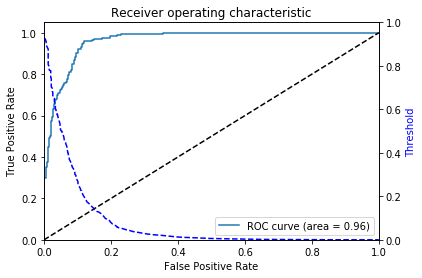

In [293]:
#2 d, e, and f

y = df.mature
scores = df.pred_both
fpr, tpr, thresholds = roc_curve(y, scores)#, cat_labels)

fig, ax = plt.subplots()
plt.plot(thresholds,fpr)
plt.xlabel('threshold')
plt.ylabel('false positive rate')
plt.show()


fig,ax = plt.subplots()
plt.plot(thresholds,tpr)
plt.xlabel('threshold')
plt.ylabel('true positive rate')
plt.show()

fig,ax = plt.subplots()
#plt.plot(roc_curve(y,scores))
plt.plot(fpr,tpr,'r.')
#ax.scatter(df.pred_both,roc_curve(df.mature,df.pred_both))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()


#thresh = []
#threshold = np.arange(0,1,0.1)
#for i in range(len(df.pred_both)):
#    cat_labels = 1*(threshold > 0.5)
#    thresh.append(df.pred_both[i])
#print(thresh)    

#thresh = 0.5
fpr, tpr, thresholds = roc_curve(y, scores)
fig,ax = plt.subplots()
plt.plot(roc_curve(y,scores))
plt.plot(fpr,tpr,'r.')

marker_on = fpr,tpr,threshold==0.2
plt.plot(fpr,tpr,'b.',markevery=marker_on)
plt.xlabel('true positive rate')
plt.ylabel('false positive rate')
#for i in thresholds:
#    if i == 0.5:
#        plt.plot(fpr,tpr,thresholds,'b+')
#        plt.show()        


roc_auc = auc(fpr, tpr) # compute area under the curve

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='b')
ax2.set_ylabel('Threshold',color='b')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
plt.show()